# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Faaris Muda Dwi Nugraha
- **Email:** faarismudadwinugraha@gmail.com / faarismudawork@gmail.com
- **ID Dicoding:** faarismuda

## Menentukan Pertanyaan Bisnis

**1. "Bagaimana performa rata-rata waktu pengiriman di tiap kota pada tahun 2017, dan apakah ada kota dengan waktu pengiriman lebih dari 10 hari yang dapat memperburuk kepuasan pelanggan?"**

- **Specific**: Fokus pada analisis waktu pengiriman di tiap kota pada tahun 2017.
- **Measurable**: Mengukur rata-rata waktu pengiriman dan identifikasi kota dengan waktu pengiriman lebih dari 10 hari.
- **Action-oriented**: Dapat digunakan untuk mengidentifikasi area yang memerlukan perbaikan dalam hal logistik dan pengiriman.
- **Relevant**: Mengoptimalkan waktu pengiriman untuk meningkatkan pengalaman pelanggan dan kepuasan.
- **Time-bound**: Membatasi analisis pada tahun 2017.

**Teknik Analisis Lanjutan**:
- **Geospatial Analysis**: Menganalisis lokasi dan waktu pengiriman menggunakan data dari `orders_dataset.csv` dan `geolocation_dataset.csv`.
    - Membuat **heatmap** untuk menunjukkan waktu pengiriman di setiap kota.
    - Menghitung **rata-rata waktu pengiriman** per kota dan mengidentifikasi **outlier**.


**2. "Apa hubungan antara frekuensi pembelian pelanggan dan total pengeluaran mereka di tahun 2017, dan bagaimana pola ini memengaruhi segmentasi pelanggan yang paling menguntungkan?"**

- **Specific**: Fokus pada analisis frekuensi pembelian dan total pengeluaran pelanggan di tahun 2017.
- **Measurable**: Menghitung frekuensi pembelian dan total pengeluaran pelanggan.
- **Action-oriented**: Membantu dalam membuat strategi pemasaran yang ditujukan untuk segmen pelanggan yang menguntungkan.
- **Relevant**: Penting untuk strategi retensi pelanggan dan peningkatan pendapatan.
- **Time-bound**: Fokus pada data tahun 2017.

**Teknik Analisis Lanjutan**:
- **RFM Analysis**: Mengukur **recency**, **frequency**, dan **monetary** untuk memahami segmentasi pelanggan berdasarkan perilaku pembelian.
    - Menganalisis dataset untuk menghitung **frekuensi** dan **total pengeluaran**.
    - Segmentasi pelanggan berdasarkan frekuensi pembelian dan total pengeluaran untuk mengidentifikasi kelompok yang paling menguntungkan.


**3. "Produk kategori mana yang memberikan kontribusi terbesar terhadap pendapatan perusahaan selama Q1 2017, dan apakah ada kategori dengan tingkat pengembalian produk (return rate) yang lebih tinggi?"**

- **Specific**: Fokus pada kontribusi pendapatan berdasarkan kategori produk selama Q1 2017.
- **Measurable**: Menghitung kontribusi pendapatan dari tiap kategori produk dan mengukur tingkat pengembalian produk.
- **Action-oriented**: Menyediakan informasi untuk perbaikan manajemen inventaris dan pengelolaan kategori produk.
- **Relevant**: Membantu dalam memprioritaskan kategori produk untuk strategi pemasaran dan pengelolaan produk.
- **Time-bound**: Fokus pada periode Q1 2017.

**Teknik Analisis Lanjutan**:
- **Clustering**: Mengelompokkan produk berdasarkan kategori dan kontribusi pendapatan untuk melihat pola kategori yang lebih menguntungkan.
    - Menganalisis data dataset untuk menghitung kontribusi pendapatan berdasarkan kategori produk.
    - Mengukur **tingkat pengembalian produk** dan mengidentifikasi kategori dengan **return rate** tinggi.

## Import Semua Packages/Library yang Digunakan

In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

!pip install contextily
import contextily as ctx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 64.0 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

In [18]:
# Baca data dari file CSV
customers = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/customers_dataset.csv")
geolocation = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/geolocation_dataset.csv")
order_items = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/order_items_dataset.csv")
order_payments = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/order_payments_dataset.csv")
order_reviews = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/order_reviews_dataset.csv")
orders = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/orders_dataset.csv", parse_dates=['order_purchase_timestamp', 'order_delivered_customer_date'])
product_category_name_translation = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/product_category_name_translation.csv")
products = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/products_dataset.csv")
sellers = pd.read_csv("https://raw.githubusercontent.com/faarismuda/E-commerce-Analysis/main/Dataset/sellers_dataset.csv")

**Q1**

In [19]:
# Filter orders dari tahun 2017
orders['order_year'] = orders['order_purchase_timestamp'].dt.year
orders_2017 = orders[orders['order_year'] == 2017]

# Hitung waktu pengiriman
orders_2017['delivery_duration'] = (orders_2017['order_delivered_customer_date'] - orders_2017['order_purchase_timestamp']).dt.days

# Gabungkan orders dengan customers untuk mendapatkan informasi kota
orders_customers = pd.merge(orders_2017, customers, on='customer_id', how='left')

# Gabung dengan reviews untuk mendapatkan skor review
orders_customers_reviews = pd.merge(orders_customers, order_reviews[['order_id', 'review_score']], on='order_id', how='left')

# Gabung dengan geolocation untuk mendapatkan latitude dan longitude
geolocation_unique = geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix', 'geolocation_city'])
merged_data = pd.merge(orders_customers_reviews, geolocation_unique,
                       left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix',
                       how='left')

# Final dataset
data_q1 = merged_data[['order_id', 'customer_city', 'delivery_duration', 'review_score',
                          'geolocation_lat', 'geolocation_lng']]

# Simpan dataset ke CSV
data_q1.to_csv('data_q1.csv', index=False)

data_q1.head()

<ipython-input-19-b28cc66cb8a5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_2017['delivery_duration'] = (orders_2017['order_delivered_customer_date'] - orders_2017['order_purchase_timestamp']).dt.days


,order_id,customer_city,delivery_duration,review_score,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,sao paulo,8.0,4.0,-23.574809,-46.587471
1,e481f51cbdc54678b7cc49136f2d6af7,sao paulo,8.0,4.0,-23.575377,-46.587410
2,949d5b44dbf5de918fe9c16f97b45f8a,sao goncalo do amarante,13.0,5.0,-5.767733,-35.275467
3,949d5b44dbf5de918fe9c16f97b45f8a,sao goncalo do amarante,13.0,5.0,-5.776335,-35.255697
4,a4591c265e18cb1dcee52889e2d8acc3,congonhinhas,16.0,4.0,-23.548581,-50.550660


**Q2**

In [7]:
# Filter orders dari tahun 2017
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders_2017 = orders[orders['order_purchase_timestamp'].dt.year == 2017]

# Gabungkan orders_2017 dengan order_items
data_q2 = orders_2017.merge(order_items, on='order_id', how='inner')

# Gabungkan dengan customers untuk mendapatkan customer_unique_id
data_q2 = data_q2.merge(customers, on='customer_id', how='inner')

# Gabungkan dengan order_payments untuk validasi total pembayaran
data_q2 = data_q2.merge(order_payments, on='order_id', how='left')

# Tambahkan kolom total pengeluaran (price + freight_value)
data_q2['total_spent'] = data_q2['price'] + data_q2['freight_value']

# Final dataset
data_q2 = data_q2[['customer_unique_id', 'order_id', 'order_purchase_timestamp',
                               'price', 'freight_value', 'total_spent',
                               'payment_value', 'payment_type']]

# Simpan dataset ke CSV
data_q2.to_csv('combined_dataset_2017.csv', index=False)

data_q2.head()

,customer_unique_id,order_id,order_purchase_timestamp,price,freight_value,total_spent,payment_value,payment_type
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,29.99,8.72,38.71,18.12,credit_card
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,29.99,8.72,38.71,2.00,voucher
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,29.99,8.72,38.71,18.59,voucher
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,45.00,27.20,72.20,72.20,credit_card
4,80bb27c7c16e8f973207a5086ab329e2,a4591c265e18cb1dcee52889e2d8acc3,2017-07-09 21:57:05,147.90,27.36,175.26,175.26,credit_card


**Q3**

**Insight:**
- xxx
- xxx

### Assessing Data

**Q1**

In [20]:
# 1. Melihat informasi umum
print("Informasi Dataset:")
print(data_q1.info())

# 2. Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(data_q1.describe(include='all'))

# 3. Memeriksa nilai yang hilang
print("\nJumlah Nilai yang Hilang per Kolom:")
print(data_q1.isnull().sum())

# 4. Memeriksa duplikasi
print("\nJumlah Baris Duplikat:")
print(data_q1.duplicated().sum())

# 5. Melihat nilai unik dalam kolom kategorikal
print("\nNilai Unik Kolom 'customer_city':")
print(data_q1['customer_city'].unique())

# 6. Validasi nilai aneh atau outlier
outliers = data_q1[data_q1['delivery_duration'] < 0]
print("\nBaris dengan Durasi Pengiriman Negatif (Outlier):")
print(outliers)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67409 entries, 0 to 67408
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           67409 non-null  object 
 1   customer_city      67409 non-null  object 
 2   delivery_duration  64899 non-null  float64
 3   review_score       66847 non-null  float64
 4   geolocation_lat    67281 non-null  float64
 5   geolocation_lng    67281 non-null  float64
dtypes: float64(4), object(2)
memory usage: 3.1+ MB
None

Statistik Deskriptif:
                                order_id customer_city  delivery_duration  \
count                              67409         67409       64899.000000   
unique                             45101          3290                NaN   
top     ffaabba06c9d293a3c614e0515ddbabc     sao paulo                NaN   
freq                                   6         12864                NaN   
mean                    

**Q2**

In [16]:
# 1. Melihat informasi umum
print("Informasi Dataset:")
print(data_q2.info())

# 2. Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(data_q2.describe(include='all'))

# 3. Memeriksa nilai yang hilang
print("\nJumlah Nilai yang Hilang per Kolom:")
print(data_q2.isnull().sum())

# 4. Memeriksa duplikasi
print("\nJumlah Baris Duplikat:")
print(data_q2.duplicated().sum())

# 5. Melihat nilai unik
print("\nCek Nilai Unik:")
print(data_q2.nunique())

# 6. Validasi konsistensi data: memastikan `total_spent` >= 0
invalid_total_spent = data_q2[data_q2['total_spent'] < 0]
if not invalid_total_spent.empty:
    print("\nBaris dengan 'total_spent' tidak valid (kurang dari 0):")
    print(invalid_total_spent)

# 7. Validasi `payment_value` vs `total_spent`
# Jika ada selisih yang terlalu besar, data bisa dianalisis lebih lanjut atau dihapus
data_q2['payment_difference'] = abs(data_q2['payment_value'] - data_q2['total_spent'])
invalid_payments = data_q2[data_q2['payment_difference'] > 100]  # Toleransi selisih 100
if not invalid_payments.empty:
    print("\nBaris dengan perbedaan signifikan antara 'payment_value' dan 'total_spent':")
    print(invalid_payments)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53539 entries, 0 to 53538
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_unique_id        53539 non-null  object        
 1   order_id                  53539 non-null  object        
 2   order_purchase_timestamp  53539 non-null  datetime64[ns]
 3   price                     53539 non-null  float64       
 4   freight_value             53539 non-null  float64       
 5   total_spent               53539 non-null  float64       
 6   payment_value             53539 non-null  float64       
 7   payment_type              53539 non-null  object        
 8   payment_difference        53539 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 3.7+ MB
None

Statistik Deskriptif:
                      customer_unique_id                          order_id  \
count         

**Q3**

**Insight:**
- xxx
- xxx

### Cleaning Data

**Q1**

In [21]:
# Menghapus duplikasi
data_q1_cleaned = data_q1.drop_duplicates()
print("\nSetelah Menghapus Duplikasi, Total Baris:", len(data_q1_cleaned))

# Menghapus baris dengan nilai yang hilang secara signifikan
data_q1_cleaned = data_q1_cleaned.dropna(subset=['delivery_duration', 'review_score', 'geolocation_lat', 'geolocation_lng'])

# Memastikan tipe data sesuai
data_q1_cleaned['delivery_duration'] = data_q1_cleaned['delivery_duration'].astype(float)
data_q1_cleaned['review_score'] = data_q1_cleaned['review_score'].astype(float)

# Simpan dataset yang sudah bersih
data_q1_cleaned.to_csv('data_q1_cleaned.csv', index=False)

print("\nDataset telah dibersihkan. Total Baris Setelah Cleaning:", len(data_q1_cleaned))



Setelah Menghapus Duplikasi, Total Baris: 66473

Dataset telah dibersihkan. Total Baris Setelah Cleaning: 63411


**Q2**

In [ ]:
# Menghapus duplikasi
data_q2_cleaned = data_q2.drop_duplicates()

# Konversi tipe data
data_q2_cleaned['order_purchase_timestamp'] = pd.to_datetime(data_q2_cleaned['order_purchase_timestamp'])  # Pastikan kolom datetime benar

# Drop baris dengan payment_difference besar
data_q2_cleaned = data_q2_cleaned[data_q2_cleaned['payment_difference'] <= 100]

# Menambahkan kolom baru untuk analisis
# Kolom 'month' untuk analisis musiman
data_q2_cleaned['month'] = data_q2_cleaned['order_purchase_timestamp'].dt.month

# Simpan dataset yang sudah bersih
data_q2_cleaned.to_csv('data_q2_cleaned.csv', index=False)

print("\nDataset telah dibersihkan. Total Baris Setelah Cleaning:", len(data_q2_cleaned))


**Q3**

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore Q1

In [29]:
# Load cleaned data
data_q1_cleaned = pd.read_csv('data_q1_cleaned.csv')

# === 1. Analisis Rata-Rata Waktu Pengiriman di Tiap Kota ===

# Hitung rata-rata waktu pengiriman per kota
city_delivery_stats = data_q1_cleaned.groupby('customer_city')['delivery_duration'].agg(['mean', 'count']).reset_index()
city_delivery_stats.rename(columns={'mean': 'avg_delivery_duration', 'count': 'order_count'}, inplace=True)

# Tampilkan kota dengan rata-rata waktu pengiriman tertinggi
top_delivery_cities = city_delivery_stats.sort_values(by='avg_delivery_duration', ascending=False).head(10)
print("\nTop 10 Kota dengan Rata-Rata Waktu Pengiriman Tertinggi:")
print(top_delivery_cities)


# === 2. Hubungan Waktu Pengiriman dengan Skor Ulasan ===
review_stats = data_q1_cleaned.groupby('delivery_duration')['review_score'].mean().reset_index()
print("\nHubungan Waktu Pengiriman dengan Skor Ulasan:")
print(review_stats)


Top 10 Kota dengan Rata-Rata Waktu Pengiriman Tertinggi:
            customer_city  avg_delivery_duration  order_count
18      adhemar de barros                   97.0            2
2212             perdizes                   95.0            2
1813        miguel calmon                   85.0            2
784    conceicao da feira                   83.0            2
2406             quintana                   79.0            2
2640             santaluz                   75.0            2
2576  santa cruz de goias                   67.0            2
1789      matoes do norte                   65.0            1
1700           machadinho                   65.0            1
165                 arace                   56.0            2

Hubungan Waktu Pengiriman dengan Skor Ulasan:
     delivery_duration  review_score
0                  0.0      4.090909
1                  1.0      4.495484
2                  2.0      4.492289
3                  3.0      4.391098
4                  4.0      

**Insight:**
- xxx
- xxx

### Explore Q2

In [ ]:
# Menghitung RFM Metrics
rfm = data_q2_cleaned.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (pd.Timestamp('2018-01-01') - pd.to_datetime(x).max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'total_spent': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['customer_unique_id', 'recency', 'frequency', 'monetary']

# Menambahkan RFM Score untuk segmentasi
rfm['R_score'] = pd.qcut(rfm['recency'], 4, labels=[4, 3, 2, 1])
rfm['F_score'] = pd.qcut(rfm['frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_score'] = pd.qcut(rfm['monetary'], 4, labels=[1, 2, 3, 4])

rfm['RFM_score'] = rfm['R_score'].astype(int) + rfm['F_score'].astype(int) + rfm['M_score'].astype(int)

# Membuat Segmentasi Pelanggan
def segment_customers(rfm_score):
    if rfm_score >= 10:
        return 'Best Customers'
    elif rfm_score >= 7:
        return 'Loyal Customers'
    elif rfm_score >= 5:
        return 'At Risk'
    else:
        return 'Lost Customers'

rfm['segment'] = rfm['RFM_score'].apply(segment_customers)

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-33-9aa76bbf06c7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_delivery_cities, x='avg_delivery_duration', y='customer_city', palette='viridis')


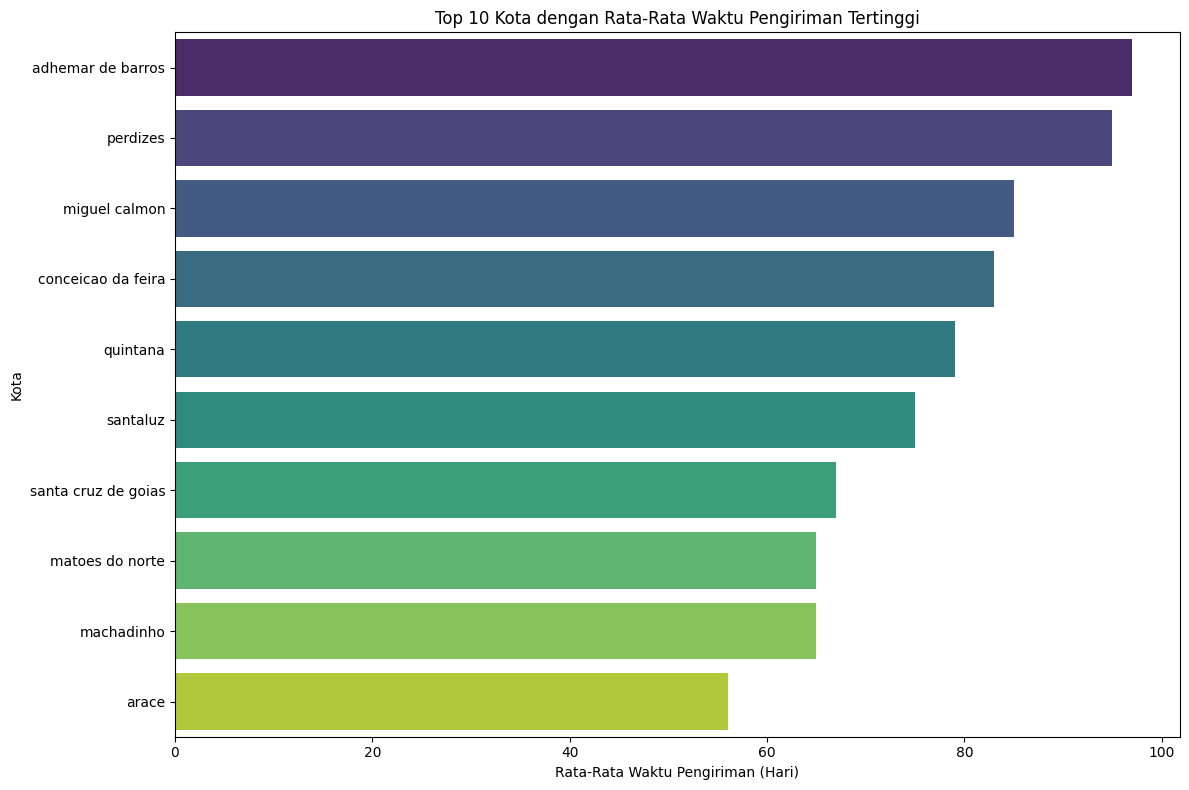

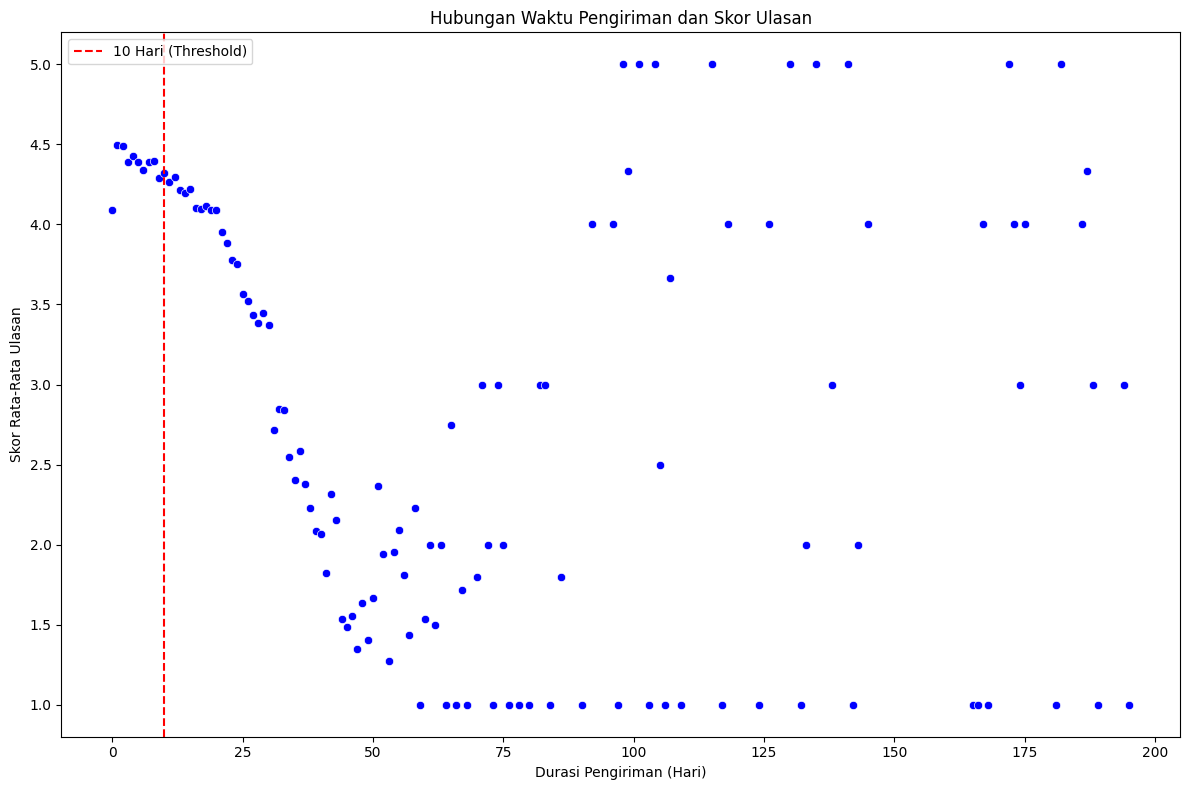

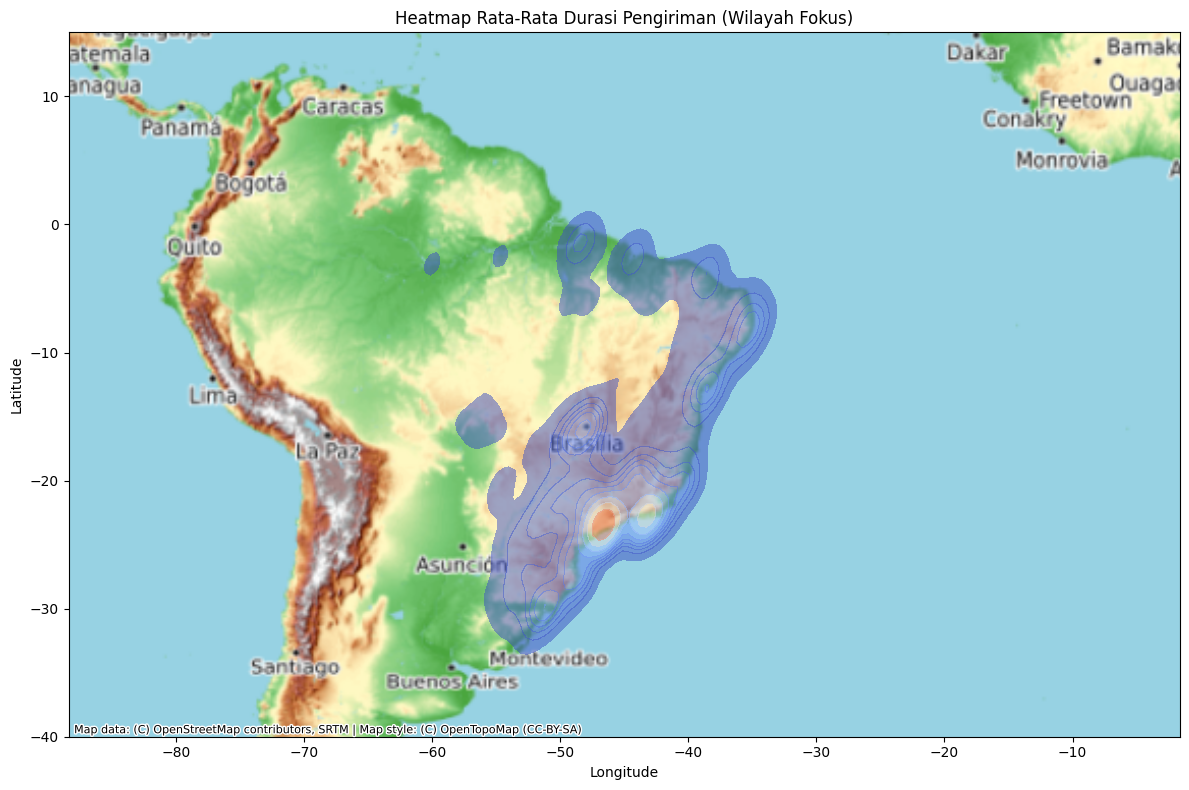

In [33]:
# Bar Plot Rata-Rata Waktu Pengiriman di Kota Teratas
plt.figure(figsize=(12, 8))
sns.barplot(data=top_delivery_cities, x='avg_delivery_duration', y='customer_city', palette='viridis')
plt.title('Top 10 Kota dengan Rata-Rata Waktu Pengiriman Tertinggi')
plt.xlabel('Rata-Rata Waktu Pengiriman (Hari)')
plt.ylabel('Kota')
plt.tight_layout()
plt.savefig('top_cities_delivery.png')
plt.show()

# Scatter Plot Hubungan Waktu Pengiriman dan Skor Ulasan
plt.figure(figsize=(12, 8))
sns.scatterplot(data=review_stats, x='delivery_duration', y='review_score', color='blue')
plt.axvline(x=10, color='red', linestyle='--', label='10 Hari (Threshold)')
plt.title('Hubungan Waktu Pengiriman dan Skor Ulasan')
plt.xlabel('Durasi Pengiriman (Hari)')
plt.ylabel('Skor Rata-Rata Ulasan')
plt.legend()
plt.tight_layout()
plt.savefig('delivery_vs_review.png')
plt.show()

# Plot Heatmap
plt.figure(figsize=(12, 8))
ax = sns.kdeplot(
    data=data_q1_cleaned,
    x='geolocation_lng',
    y='geolocation_lat',
    weights=data_q1_cleaned['delivery_duration'],
    cmap='coolwarm',
    fill=True,
    alpha=0.5
)

# Menambahkan peta dasar
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenTopoMap)

# Memperbesar tampilan sesuai fokus (Brasil dan sekitarnya)
ax.set_xlim([-65, -25])  # Rentang longitude
ax.set_ylim([-40, 15])   # Rentang latitude

# Atur rasio aspek
ax.set_aspect('equal', adjustable='datalim')  # Rasio latitude dan longitude sama

# Tambahkan judul dan label
plt.title('Heatmap Rata-Rata Durasi Pengiriman (Wilayah Fokus)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()

# Simpan dan tampilkan
plt.savefig('optimized_zoomed_delivery_heatmap.png')
plt.show()

**Insight:**
- xxx
- xxx

### Pertanyaan 2:

In [34]:
# Distribusi Frekuensi Pembelian
plt.figure(figsize=(8, 6))
sns.histplot(rfm['frequency'], bins=20, kde=True)
plt.title('Distribusi Frekuensi Pembelian')
plt.xlabel('Frekuensi Pembelian')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Distribusi Total Pengeluaran
plt.figure(figsize=(8, 6))
sns.histplot(rfm['monetary'], bins=20, kde=True, color='orange')
plt.title('Distribusi Total Pengeluaran')
plt.xlabel('Total Pengeluaran (Monetary)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Hubungan antara Frekuensi dan Total Pengeluaran
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='frequency', y='monetary', hue='segment', palette='viridis')
plt.title('Hubungan antara Frekuensi Pembelian dan Total Pengeluaran')
plt.xlabel('Frekuensi Pembelian')
plt.ylabel('Total Pengeluaran')
plt.legend(title='Segmentasi Pelanggan')
plt.show()

# Segmentasi Pelanggan (RFM Heatmap)
rfm_summary = rfm.groupby('segment').agg({
    'customer_unique_id': 'count',
    'frequency': 'mean',
    'monetary': 'mean'
}).sort_values(by='monetary', ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(rfm_summary[['frequency', 'monetary']], annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('RFM Summary (Segmentasi Pelanggan)')
plt.ylabel('Segmentasi')
plt.show()

NameError: name 'rfm' is not defined

<Figure size 800x600 with 0 Axes>

**Insight:**
- xxx
- xxx

### Pertanyaan 3:

**Insight:**
- xxx
- xxx

## Analisis Lanjutan

## Conclusion

- Conclusion pertanyaan 1
- Conclusion pertanyaan 2
- Conclusion pertanyaan 3